In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlp
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import pylab
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

# READING DATASET 

In [112]:
dt = pd.read_csv('heart.csv')

In [113]:
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [114]:
dt.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [115]:
dt.shape

(303, 14)

In [116]:
dt.columns = ['age', 'gender', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [117]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   gender                   303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [118]:
dt['gender'][dt['gender'] == 0] = 'female'
dt['gender'][dt['gender'] == 1] = 'male'

dt['chest_pain_type'][dt['chest_pain_type'] == 0] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'asymptomatic'

dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 0] = 'no'
dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 1] = 'yes'

dt['st_slope'][dt['st_slope'] == 0] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 1] = 'flat'
dt['st_slope'][dt['st_slope'] == 2] = 'downsloping'

dt['thalassemia'][dt['thalassemia'] == 1] = 'normal'
dt['thalassemia'][dt['thalassemia'] == 2] = 'fixed defect'
dt['thalassemia'][dt['thalassemia'] == 3] = 'reversable defect'

C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/2847885026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['gender'][dt['gender'] == 0] = 'female'
C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/2847885026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['gender'][dt['gender'] == 1] = 'male'
C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/2847885026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['chest_pain_type

In [119]:
dt.head(10)

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,1
5,57,male,typical angina,140,192,lower than 120mg/ml,ST-T wave abnormality,148,no,0.4,flat,0,normal,1
6,56,female,atypical angina,140,294,lower than 120mg/ml,normal,153,no,1.3,flat,0,fixed defect,1
7,44,male,atypical angina,120,263,lower than 120mg/ml,ST-T wave abnormality,173,no,0.0,downsloping,0,reversable defect,1
8,52,male,non-anginal pain,172,199,greater than 120mg/ml,ST-T wave abnormality,162,no,0.5,downsloping,0,reversable defect,1
9,57,male,non-anginal pain,150,168,lower than 120mg/ml,ST-T wave abnormality,174,no,1.6,downsloping,0,fixed defect,1


In [120]:
dt1 = dt.copy(deep = True)

In [121]:
dt1.head()

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,1


In [122]:
dt.age.unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [123]:
dt.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

In [124]:
dt.gender.unique()

array(['male', 'female'], dtype=object)

In [125]:
dt.gender.value_counts()

male      207
female     96
Name: gender, dtype: int64

In [126]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   gender                   303 non-null    object 
 2   chest_pain_type          303 non-null    object 
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    object 
 6   rest_ecg                 303 non-null    object 
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    object 
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    object 
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    object 
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(6), o

In [127]:
dt.chest_pain_type.unique()

array(['asymptomatic', 'non-anginal pain', 'atypical angina',
       'typical angina'], dtype=object)

In [128]:
dt.chest_pain_type.value_counts()

typical angina      143
non-anginal pain     87
atypical angina      50
asymptomatic         23
Name: chest_pain_type, dtype: int64

In [129]:
dt.resting_blood_pressure.unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [130]:
dt.resting_blood_pressure.value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: resting_blood_pressure, dtype: int64

In [131]:
dt.cholesterol.unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

In [132]:
dt.cholesterol.value_counts()

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: cholesterol, Length: 152, dtype: int64

In [133]:
dt.columns

Index(['age', 'gender', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [134]:
dt.fasting_blood_sugar.unique()

array(['greater than 120mg/ml', 'lower than 120mg/ml'], dtype=object)

In [135]:
dt.fasting_blood_sugar.value_counts()


lower than 120mg/ml      258
greater than 120mg/ml     45
Name: fasting_blood_sugar, dtype: int64

In [136]:
dt.rest_ecg.unique()

array(['normal', 'ST-T wave abnormality', 'left ventricular hypertrophy'],
      dtype=object)

In [137]:
dt.rest_ecg.value_counts()

ST-T wave abnormality           152
normal                          147
left ventricular hypertrophy      4
Name: rest_ecg, dtype: int64

In [138]:
dt.max_heart_rate_achieved.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: max_heart_rate_achieved, Length: 91, dtype: int64

In [139]:
dt.columns

Index(['age', 'gender', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [140]:
dt.max_heart_rate_achieved.unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [141]:
dt.exercise_induced_angina.unique()

array(['no', 'yes'], dtype=object)

In [142]:
dt.exercise_induced_angina.value_counts()

no     204
yes     99
Name: exercise_induced_angina, dtype: int64

In [143]:
dt.st_depression.value_counts()

0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: st_depression, dtype: int64

In [144]:
dt.st_depression.value_counts()

0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: st_depression, dtype: int64

In [145]:
dt.columns

Index(['age', 'gender', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [146]:
dt.st_slope.unique()

array(['upsloping', 'downsloping', 'flat'], dtype=object)

In [147]:
dt.st_slope.value_counts()

downsloping    142
flat           140
upsloping       21
Name: st_slope, dtype: int64

In [148]:
dt.num_major_vessels.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: num_major_vessels, dtype: int64

In [149]:
dt.num_major_vessels.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [150]:
dt.thalassemia.unique()

array(['normal', 'fixed defect', 'reversable defect', 0], dtype=object)

In [151]:
dt.thalassemia.value_counts()

fixed defect         166
reversable defect    117
normal                18
0                      2
Name: thalassemia, dtype: int64

# CHECK FOR OUTLIERS

{'whiskers': [<matplotlib.lines.Line2D at 0x2c200def430>,
 'caps': [<matplotlib.lines.Line2D at 0x2c200def880>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c200def160>],
 'medians': [<matplotlib.lines.Line2D at 0x2c200defe50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c200dfe160>],
 'means': []}

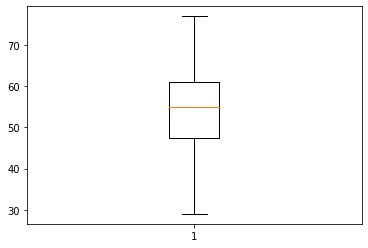

In [152]:
mlp.boxplot(dt.age)

In [153]:
dt.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2c200c11970>,
 'caps': [<matplotlib.lines.Line2D at 0x2c200c11790>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c200c112b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c200c24c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c200c24730>],
 'means': []}

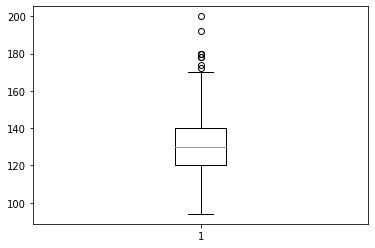

In [154]:
mlp.boxplot(dt.resting_blood_pressure)

{'whiskers': [<matplotlib.lines.Line2D at 0x2c200b694c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c200b69250>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c200566fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c200b69940>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c20056dc70>],
 'means': []}

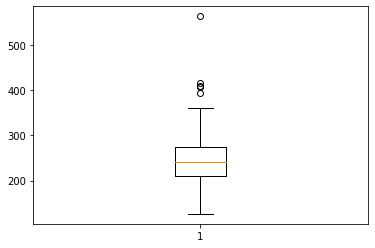

In [155]:
mlp.boxplot(dt.cholesterol)

{'whiskers': [<matplotlib.lines.Line2D at 0x2c2004a9fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c2004a9280>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c2004bb250>],
 'medians': [<matplotlib.lines.Line2D at 0x2c2004a9a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c2004a9cd0>],
 'means': []}

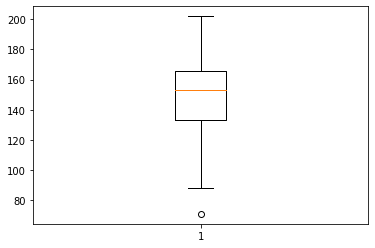

In [156]:
mlp.boxplot(dt.max_heart_rate_achieved)

{'whiskers': [<matplotlib.lines.Line2D at 0x2c27e9c15b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c27e9bf3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c27e9c1880>],
 'medians': [<matplotlib.lines.Line2D at 0x2c27e9bfbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c27e9bf550>],
 'means': []}

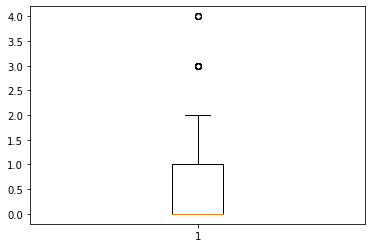

In [157]:
mlp.boxplot(dt.num_major_vessels)

# STATISTICAL EDA

In [50]:
dt.mean()

C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/2162581429.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dt.mean()


age                         54.366337
resting_blood_pressure     131.623762
cholesterol                246.264026
max_heart_rate_achieved    149.646865
st_depression                1.039604
num_major_vessels            0.729373
target                       0.544554
dtype: float64

In [51]:
dt.median()

C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/3024937849.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dt.median()


age                         55.0
resting_blood_pressure     130.0
cholesterol                240.0
max_heart_rate_achieved    153.0
st_depression                0.8
num_major_vessels            0.0
target                       1.0
dtype: float64

In [52]:
dt.mode()

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,58.0,male,typical angina,120.0,197,lower than 120mg/ml,ST-T wave abnormality,162.0,no,0.0,downsloping,0.0,fixed defect,1.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
dt.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000


# PROFILING REPORT

In [54]:
import pandas_profiling

In [55]:
pandas_profiling.ProfileReport(dt)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
dt.corr()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,0.276326,-0.225439
resting_blood_pressure,0.279351,1.000000,0.123174,-0.046698,0.193216,0.101389,-0.144931
cholesterol,0.213678,0.123174,1.000000,-0.009940,0.053952,0.070511,-0.085239
max_heart_rate_achieved,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.213177,0.421741
st_depression,0.210013,0.193216,0.053952,-0.344187,1.000000,0.222682,-0.430696
num_major_vessels,0.276326,0.101389,0.070511,-0.213177,0.222682,1.000000,-0.391724
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,-0.391724,1.000000


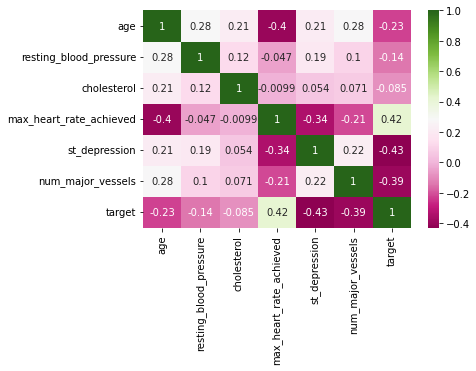

In [57]:
dataplot = sns.heatmap(dt.corr(),cmap = "PiYG",annot = True)
mlp.rcParams['figure.figsize'] = [10,7]

# FEATURE ENGINEERING

### ENCODERS- ONE HOT ENCODER

In [109]:
dt1 = dt.copy(deep = True)

In [110]:
pd.get_dummies(dt1, drop_first=True)

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,age_log,age_rcp,age_sqrt,...,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,4.143135,0.015873,7.937254,...,0,0,0,1,0,0,1,0,1,0
1,37,130,250,187,3.5,0,1,3.610918,0.027027,6.082763,...,0,1,0,0,0,0,1,1,0,0
2,41,130,204,172,1.4,0,1,3.713572,0.024390,6.403124,...,0,1,0,1,0,0,0,1,0,0
3,56,120,236,178,0.8,0,1,4.025352,0.017857,7.483315,...,0,1,0,0,0,0,0,1,0,0
4,57,120,354,163,0.6,0,1,4.043051,0.017544,7.549834,...,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,4.043051,0.017544,7.549834,...,1,1,0,0,1,1,0,0,0,1
299,45,110,264,132,1.2,0,0,3.806662,0.022222,6.708204,...,0,1,0,0,0,1,0,0,0,1
300,68,144,193,141,3.4,2,0,4.219508,0.014706,8.246211,...,1,0,0,0,0,1,0,0,0,1
301,57,130,131,115,1.2,1,0,4.043051,0.017544,7.549834,...,1,1,0,0,1,1,0,0,0,1


### TRANSFORMATIONS

Q-Q AND KDE PLOT

<AxesSubplot:xlabel='age', ylabel='Density'>

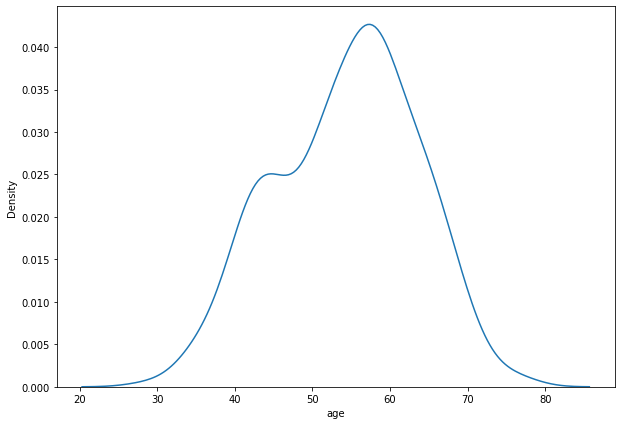

In [68]:
sns.kdeplot(dt.age)

((array([-2.83587732, -2.53977915, -2.3721488 , -2.25270611, -2.15873923,
         -2.08068092, -2.01355914, -1.95444546, -1.9014639 , -1.85333753,
         -1.80915637, -1.76824812, -1.73010145, -1.69431802, -1.6605812 ,
         -1.62863502, -1.59826945, -1.56930992, -1.54160973, -1.51504433,
         -1.48950705, -1.46490582, -1.44116054, -1.41820113, -1.39596588,
         -1.37440015, -1.35345534, -1.333088  , -1.31325913, -1.29393359,
         -1.27507957, -1.25666822, -1.23867328, -1.22107074, -1.20383863,
         -1.18695677, -1.17040658, -1.1541709 , -1.1382339 , -1.12258087,
         -1.10719816, -1.09207308, -1.07719379, -1.06254924, -1.04812909,
         -1.03392365, -1.01992386, -1.00612116, -0.99250752, -0.97907539,
         -0.96581763, -0.95272748, -0.93979859, -0.92702491, -0.91440073,
         -0.90192062, -0.88957943, -0.87737226, -0.86529445, -0.85334157,
         -0.84150938, -0.82979385, -0.81819112, -0.8066975 , -0.79530947,
         -0.78402367, -0.77283685, -0.

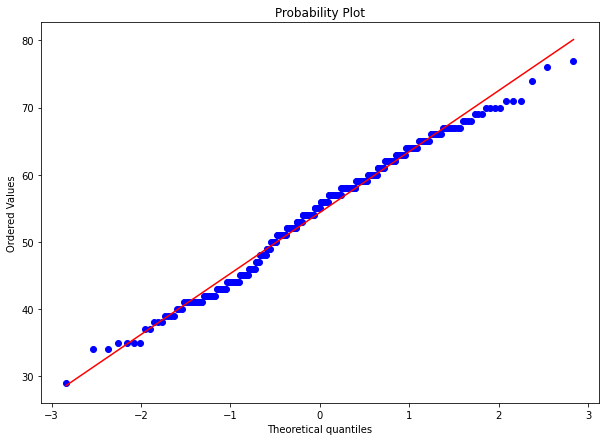

In [69]:
stats.probplot(dt.age,plot=pylab)

In [70]:
def normality(data,feature):
    mlp.figure(figsize=(10,5))
    mlp.subplot(1,2,1)
    sns.kdeplot(data[feature])
    mlp.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    mlp.show()

C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/967313236.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  mlp.show()


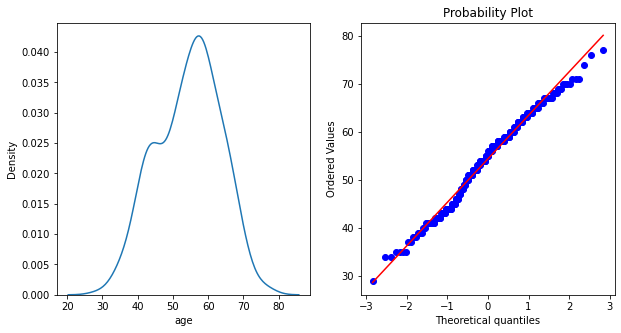

In [71]:
normality(dt,'age')

C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/967313236.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  mlp.show()


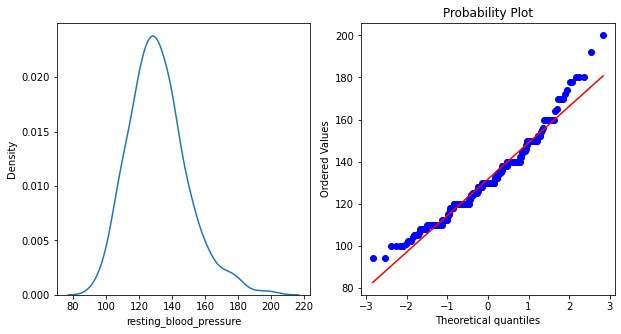

In [72]:
normality(dt,'resting_blood_pressure')

C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/967313236.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  mlp.show()


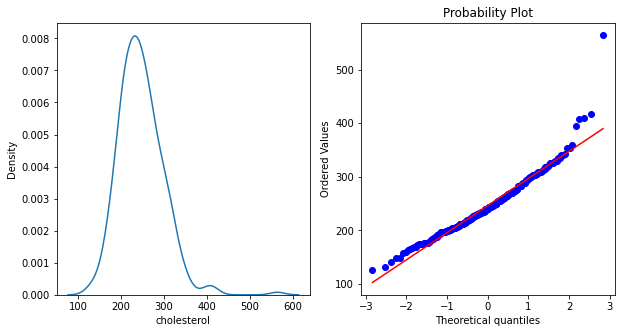

In [73]:
normality(dt,'cholesterol')

C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/967313236.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  mlp.show()


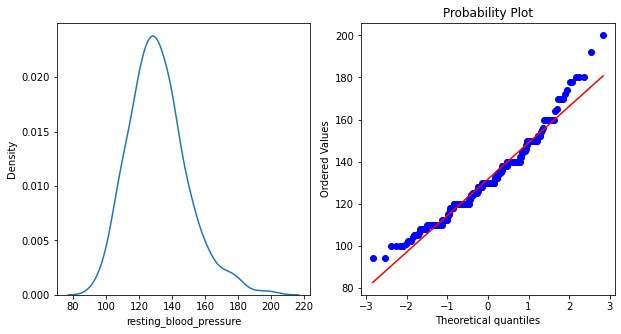

In [74]:
normality(dt,'resting_blood_pressure')

C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/967313236.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  mlp.show()


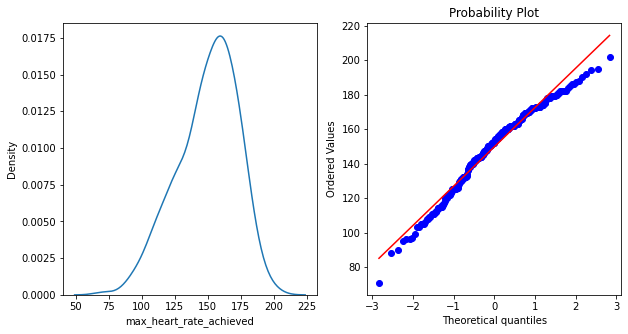

In [81]:
normality(dt,'max_heart_rate_achieved')

C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/967313236.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  mlp.show()


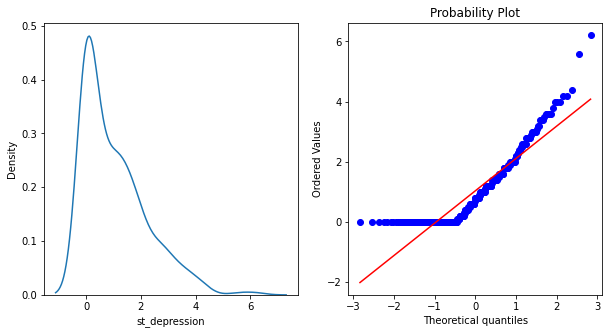

In [82]:
normality(dt,'st_depression')

C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/967313236.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  mlp.show()


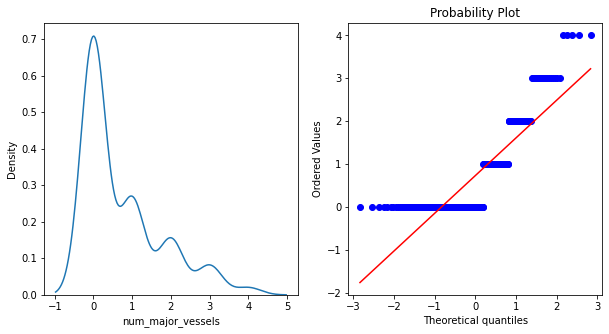

In [83]:
normality(dt,'num_major_vessels')

### TRANSFORMATIONS(log, sqrt, exp , reciprocal, boxcox)

In [84]:
dt['age_log'] = np.log(dt['age'])

C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/967313236.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  mlp.show()


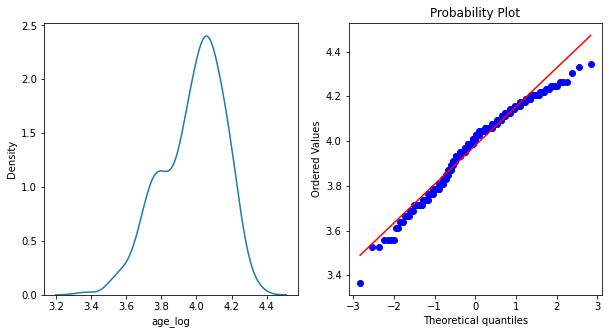

In [85]:
normality(dt,'age_log')

In [86]:
dt['age_rcp'] = 1/dt.age

C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/967313236.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  mlp.show()


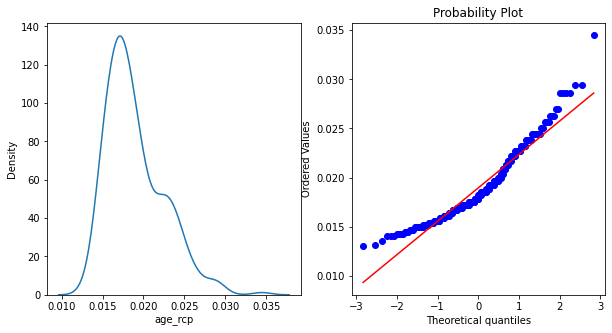

In [87]:
normality(dt,'age_rcp')

In [88]:
dt['age_sqrt'] = np.sqrt(dt.age)

C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/967313236.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  mlp.show()


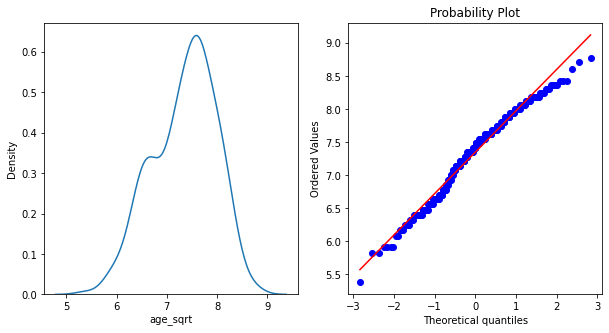

In [89]:
normality(dt,'age_sqrt')

In [90]:
dt['age_bcx'],parameters = stats.boxcox(dt['age'])

C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/967313236.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  mlp.show()


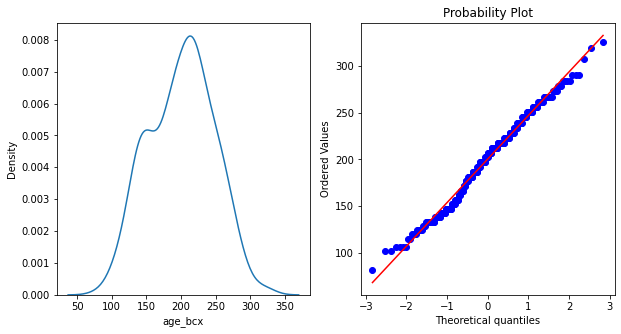

In [91]:
normality(dt,'age_bcx')

In [92]:
dt['resting_blood_pressure_log'] = np.log(dt['resting_blood_pressure'])

C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/967313236.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  mlp.show()


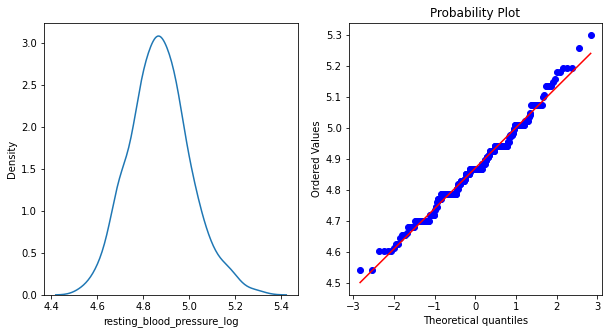

In [93]:
normality(dt,'resting_blood_pressure_log')

In [94]:
dt['resting_blood_pressure_rcp'] = 1/dt.resting_blood_pressure

C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/967313236.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  mlp.show()


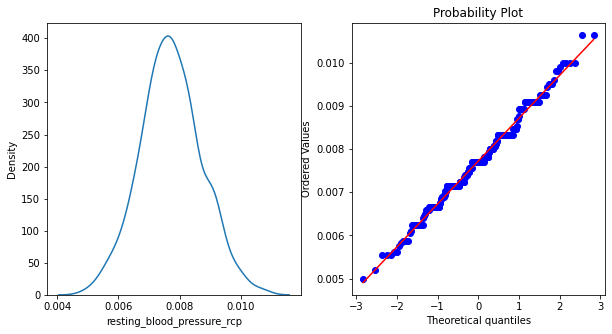

In [95]:
normality(dt,'resting_blood_pressure_rcp')

C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/967313236.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  mlp.show()


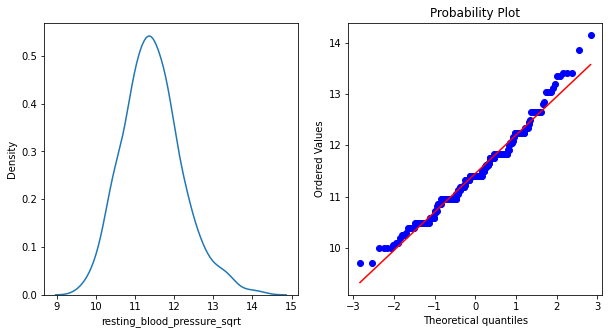

In [96]:
dt['resting_blood_pressure_sqrt'] = np.sqrt(dt.resting_blood_pressure)
normality(dt,'resting_blood_pressure_sqrt')

C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/967313236.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  mlp.show()


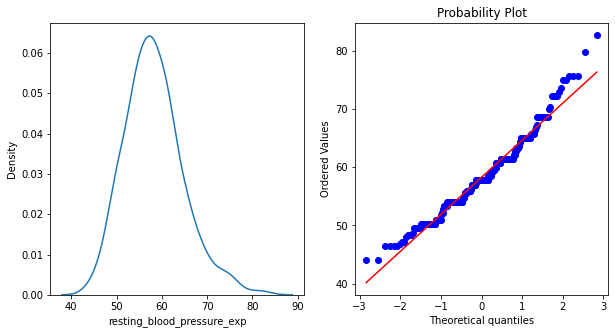

In [97]:
dt['resting_blood_pressure_exp'] = dt.resting_blood_pressure**(1/1.2)
normality(dt,'resting_blood_pressure_exp')

C:\Users\IIOT\AppData\Local\Temp/ipykernel_10792/967313236.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  mlp.show()


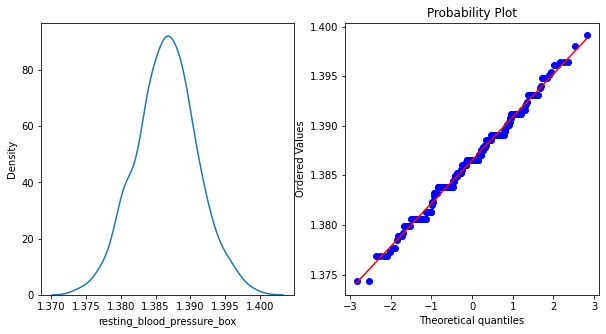

In [98]:
dt['resting_blood_pressure_box'],parameters = stats.boxcox(dt['resting_blood_pressure'])
normality(dt,'resting_blood_pressure_box')

# DATA SPLITING